# 🎮GameSelect


## ✅ Checklist
- [ ] Descrição do problema e público-alvo
- [ ] Carregamento do dataset `games_catalog_G4.csv`
- [ ] Dicionário de dados
- [ ] EDA (exploração, gráficos, estatísticas)
- [ ] Limpeza (ausentes/outliers) e justificativas
- [ ] Vetorização de gêneros (multi-hot)
- [ ] Similaridade cosseno
- [ ] Função de recomendação + casos de teste
- [ ] Insights e próximos passos


## 1. Descrição do Problema
* Objetivo: Recomendar jogos com base na similaridade do último titulo jogado
* Público alvo: Gamers ou pessoas interessadas em jogos
* Critério de sucesso: **recomendar 5 jogos similares** a um título dado

## 2. Carregando o Dataset e as Bibliotecas utilizadas

Carregando as blibiotecas necessárias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/fisicorj/aulacienciadedados/refs/heads/main/games_catalog_G4.csv")
df.tail()

,title,genres,platform,price,rating,reviews_count,release_year,age_rating
25,Brawl Stars,"Action,Multiplayer,MOBA",Mobile,0.00,4.51,45478,2020,12+
26,PUBG Mobile,"Shooter,Battle Royale,Multiplayer",Mobile,9.99,4.20,81055,2024,E
27,Pokemon GO,"AR,Casual,Adventure",Mobile,0.00,4.12,348312,2011,12+
28,Among Us,"Party,Multiplayer,Social Deduction",Mobile,0.00,4.38,151105,2018,12+
29,Call of Duty Mobile,"Shooter,Multiplayer,Action",Mobile,14.99,3.67,44281,2014,18+


## 4. EDA — Análise Exploratória (Utilizando Pandas)

### 4.1 Estrutura e tipos

In [3]:
print("Linhas x Colunas:\n", df.shape) # Exibe número de Linhas x Colunas
print("\nTipos:\n", df.dtypes) # Exibe os tipos de dados

Linhas x Colunas:
 (30, 8)

Tipos:
 title             object
genres            object
platform          object
price            float64
rating           float64
reviews_count      int64
release_year       int64
age_rating        object
dtype: object


### 4.2 Estatísticas descritivas

In [4]:
print("Média: \n", df[["price", "rating", "reviews_count", "release_year"]].mean().round(1))
print("\nMediana: \n", df[["price", "rating", "reviews_count", "release_year"]].median().round(1))
print()
df.describe().round(1)

Média: 
 price               106.4
rating                4.1
reviews_count    244289.2
release_year       2016.3
dtype: float64

Mediana: 
 price                88.8
rating                4.1
reviews_count    251471.5
release_year       2016.0
dtype: float64



,price,rating,reviews_count,release_year
count,30.0,30.0,30.0,30.0
mean,106.4,4.1,244289.2,2016.3
std,94.2,0.4,153257.0,4.6
min,0.0,3.5,19112.0,2009.0
25%,15.0,3.8,109224.0,2012.2
50%,88.8,4.1,251471.5,2016.0
75%,205.9,4.4,391368.2,2020.0
max,278.5,4.9,483771.0,2024.0


### 4.3 Valores ausentes

In [5]:
if df.isnull().any().any():
  print("Colunas com valores nulos e suas contagens:")
  print(df.isnull().sum()[df.isnull().sum() > 0])
else:
  print("Não tem valores nulos")

Não tem valores nulos


### 4.4 Distribuições e contagens (exemplos)

In [6]:
contagem_generos = df["genres"].value_counts().sort_index()
contagem_plataforma = df['platform'].value_counts() # .value_counts() Conta quantas vezes cada valor aparece em uma coluna.
contagem_ano = df['release_year'].value_counts().sort_index() # .sort_index() organiza os dados pela ordem dos índices, e não pelos valores das colunas.

print(contagem_plataforma)
print()
print(contagem_generos)
print()
print(contagem_ano)

platform
PC         10
Console    10
Mobile     10
Name: count, dtype: int64

genres
AR,Casual,Adventure                   1
Action,Adventure,Story Rich           2
Action,Hardcore,Adventure             1
Action,Multiplayer,MOBA               1
Action,Open World,Adventure           2
Action,Open World,Story Rich          1
Action,Roguelike,Indie                1
Action,Story Rich,Survival            1
Metroidvania,Indie,Platformer         1
Party,Multiplayer,Social Deduction    1
Platformer,Indie,Precision            1
Puzzle,Casual,Match-3                 1
Puzzle,Co-op,Sci-Fi                   1
RPG,Open World,Adventure              1
RPG,Open World,Anime                  1
RPG,Open World,Story Rich             1
RPG,Tactical,Story Rich               1
Racing,Open World,Simulation          1
Racing,Simulation,Competitive         1
Runner,Casual,Arcade                  1
Sandbox,Survival,Adventure            1
Shooter,Battle Royale,Multiplayer     1
Shooter,Competitive,Multiplayer    

### 4.5 Visualizações (Usando matplotlib)

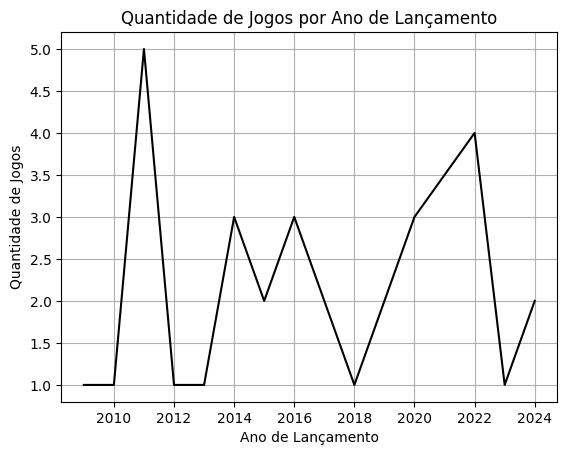

In [33]:
plt.plot(contagem_ano.index, contagem_ano.values, color="black")
plt.title("Quantidade de Jogos por Ano de Lançamento")
plt.xlabel("Ano de Lançamento")
plt.ylabel("Quantidade de Jogos")
plt.grid(True)
plt.show()

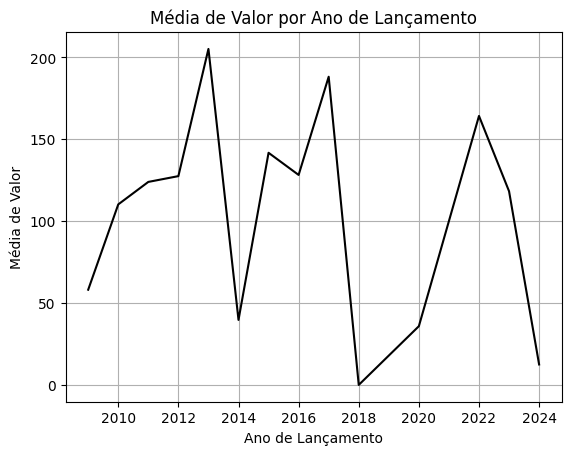

In [54]:
media_preco_por_ano = df.groupby('release_year')['price'].mean()
plt.plot(media_preco_por_ano.index, media_preco_por_ano.values, color="black")
plt.title("Média de Valor por Ano de Lançamento")
plt.xlabel("Ano de Lançamento")
plt.ylabel("Média de Valor")
plt.grid(True)
plt.show()

## 5. Limpeza de Dados (ausentes e outliers)
Descreva o que foi feito e por quê.

In [8]:
# Verifica se tem valores ausentes, se não tiver retorna uma mensagem confirmando
if df.isnull().any().any() == 0:
  print("Não tem valores ausentes")
else: # Se tiver valores ausentes nas colunas numéricas, vai tratar esses valores adicionando a média
  df["price"].fillna(df["price"].mean(), inplace=True)
  df["release_year"].fillna(df["release_year"].mean(), inplace=True)
  df["age_rating"].fillna(df["age_rating"].mean(), inplace=True)
  df["rating"].fillna(df["rating"].mean(), inplace=True)
  df["reviews_count"].fillna(df["reviews_count"].mean(), inplace=True)

Não tem valores ausentes


In [9]:
x = df["price"].to_numpy()
z = (x - np.mean(x)) / np.std(x, ddof=0)
df["z_preco"] = z

# Define outliers como |z| > 2
outliers = df[np.abs(df["z_preco"]) > 2]
print("Outliers encontrados:", len(outliers))
outliers.head()

Outliers encontrados: 0


,title,genres,platform,price,rating,reviews_count,release_year,age_rating,z_preco


## 6. Preparação para Recomendação — Vetorização de Gêneros

Criando uma matriz **multi-hot** (uma coluna por gênero).

In [21]:
genres_df = df['genres'].str.get_dummies(sep=',')
genres_df.columns = genres_df.columns.str.strip() # Clean up column names
df = pd.concat([df, genres_df], axis=1)
genre_cols = genres_df.columns.tolist()
X = df[genre_cols].values
name_col = 'title'
artist_col = None
genre_cols

['AR',
 'Action',
 'Adventure',
 'Anime',
 'Arcade',
 'Battle Royale',
 'Casual',
 'Co-op',
 'Competitive',
 'Farming',
 'Hardcore',
 'Indie',
 'MOBA',
 'Match-3',
 'Metroidvania',
 'Multiplayer',
 'Open World',
 'Party',
 'Platformer',
 'Precision',
 'Puzzle',
 'RPG',
 'Racing',
 'Roguelike',
 'Runner',
 'Sandbox',
 'Sci-Fi',
 'Shooter',
 'Simulation',
 'Social Deduction',
 'Story Rich',
 'Strategy',
 'Survival',
 'Tactical',
 'Tower Defense']

## 7. Similaridade Cosseno

In [45]:
def cosine_similarity(a: np.ndarray, b: np.ndarray) -> float:
    denom = (np.linalg.norm(a) * np.linalg.norm(b))
    if denom == 0.0:
        return 0.0
    return float(np.dot(a, b) / denom)

def cosine_sim_vector_to_matrix(vec: np.ndarray, mat: np.ndarray) -> np.ndarray:
    vec = vec.reshape(1, -1)
    dot = mat @ vec.T                   # (n,1)
    norms = (np.linalg.norm(mat, axis=1) * np.linalg.norm(vec))
    norms[norms == 0.0] = 1e-9
    return (dot.ravel() / norms)

## 8. Função de Recomendação

In [46]:
def recommend_by_title(df, X, title, k=5, name_col='title', artist_col=None):
    # localizar índice pelo nome
    matches = df[df["title"].str.lower() == title.strip().lower()]
    assert not matches.empty, f"Título '{title}' não encontrado na coluna '{name_col}'."
    idx = matches.index[0]

    sims = cosine_sim_vector_to_matrix(X[idx], X)
    order = np.argsort(-sims)  # decrescente
    recs_idx = [i for i in order if i != idx][:k]

    cols_to_show = [name_col]
    if artist_col and artist_col in df.columns:
        cols_to_show.append(artist_col)
    cols_to_show += genre_cols # This will now use the updated genre_cols
    out = df.loc[recs_idx, cols_to_show].copy()
    out.insert(1, "similaridade", sims[recs_idx])
    return out.reset_index(drop=True)

## 9. Teste do Recomendador

In [49]:
#@title Selecione o título e o range (K)
title = "Uncharted 4"  #@param {type:"string"}
k = 5            #@param {type:"slider", min:1, max:15, step:1}

results = recommend_by_title(df, X, title, k=k, name_col=name_col, artist_col=artist_col)
results

,title,similaridade,AR,AR,Action,Action,Adventure,Adventure,Anime,Anime,...,Story Rich,Story Rich,Strategy,Strategy,Survival,Survival,Tactical,Tactical,Tower Defense,Tower Defense
0,God of War,1.000000,0,0,1,1,1,1,0,0,...,1,1,0,0,0,0,0,0,0,0
1,Horizon Zero Dawn,0.666667,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,The Last of Us,0.666667,0,0,1,1,0,0,0,0,...,1,1,0,0,1,1,0,0,0,0
3,Spider-Man,0.666667,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Bloodborne,0.666667,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## 10. Visualização dos Resultados

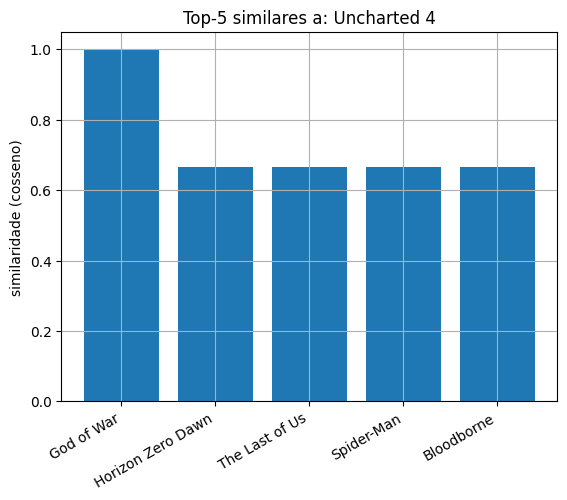

In [50]:
labels = results[name_col].tolist()
scores = results['similaridade'].tolist()

plt.figure()
plt.bar(range(len(scores)), scores)
plt.xticks(range(len(scores)), labels, rotation=30, ha='right')
plt.ylabel("similaridade (cosseno)")
plt.title(f"Top-{len(scores)} similares a: {title}")
plt.grid(True)
plt.show()

## 11. Insights e Próximos Passos

## Insights
1 - O ano de 2011 foi o ano que mais teve lançamentos de games

2 - Ao longo dos anos o preço dos jogos foi caindo

## Próximos Passos

1 - Explorar melhor funções como groupby (Pandas) e funções estatísticas do NumPy

2 - Utilizar uma base de dados mais "real" para tratar valores nulos